In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from collections import Counter
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [57]:
#iris = datasets.load_iris(as_frame=True)
#iris1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     #columns= iris['feature_names'] + ['target'])
iris2=pd.read_csv("./iris-data.csv")

In [60]:
#iris1
iris2.dtypes


sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [61]:
iris2['class'] = iris2['class'].replace({'Iris-setossa':'Iris-setosa', 'versicolor': 'Iris-versicolor'})

#ENCONDE CLASS NEEDED
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for class_var in ['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica']:
    iris2['class_cat'] = le.fit_transform(iris2['class'])  



In [62]:
iris2['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [63]:
iris2.describe()
iris2

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,class_cat
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,2.3,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


<AxesSubplot:xlabel='petal_length_cm', ylabel='Count'>

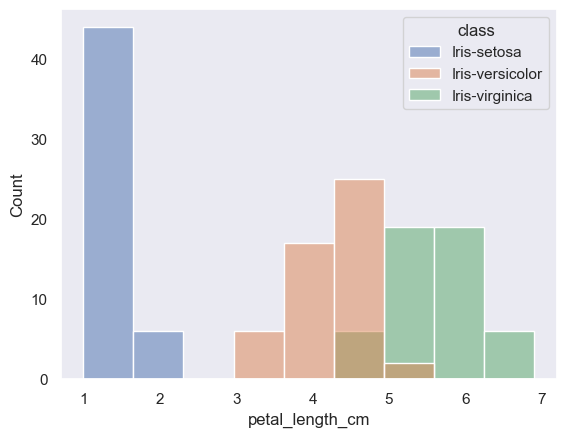

In [64]:
#sepal width (cm),petal length (cm),petal width (cm),target,sepal length (cm)
#sns.histplot(data=iris1, x="target")

#distributuon of petal lenght need observation as well as petal width
#Three targets only
sns.histplot(data=iris2, x="petal_length_cm", hue="class")

<AxesSubplot:ylabel='Count'>

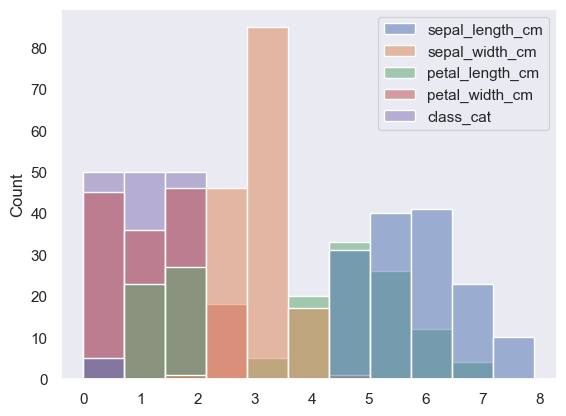

In [65]:
sns.histplot(data=iris2)

In [66]:
#'petal length (cm)'(FALSE),'petal width (cm)(FALSE)','target'(FALSE),'sepal length (cm)(FALSE)',sepal width (cm)(FALSE)
check_nan = iris2['petal_width_cm'].isnull().values.any()
#check_nan = iris2['sepal_width_cm'].isnull().values.any()
check_nan


True

In [67]:
iris2 = iris2.dropna(axis=0, subset=['petal_width_cm'])
check_nan = iris2['petal_width_cm'].isnull().values.any()
check_nan

False

In [68]:
iris2['sepal_length_cm'].unique()

array([5.1  , 4.9  , 4.7  , 4.6  , 5.   , 5.4  , 4.8  , 5.7  , 5.8  ,
       5.2  , 5.5  , 4.4  , 4.5  , 5.3  , 7.   , 6.4  , 6.9  , 6.5  ,
       6.3  , 6.6  , 5.9  , 6.   , 6.1  , 5.6  , 6.7  , 6.2  , 6.8  ,
       0.067, 0.06 , 0.057, 0.055, 7.1  , 7.6  , 7.3  , 7.2  , 7.7  ,
       7.4  , 7.9  ])

In [69]:

iris2['sepal_length_cm'].replace({ 0.067: 6.7, 0.06: 6,0.057: 5.7,0.055: 5.5}, inplace=True)

/var/folders/hb/xj_6fd8j1mb6yg8v3bk_xxzw0000gn/T/ipykernel_29739/262996371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris2['sepal_length_cm'].replace({ 0.067: 6.7, 0.06: 6,0.057: 5.7,0.055: 5.5}, inplace=True)


In [70]:
iris2['sepal_length_cm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.8, 5.7, 5.8, 5.2, 5.5, 4.4, 4.5,
       5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7, 6.2,
       6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

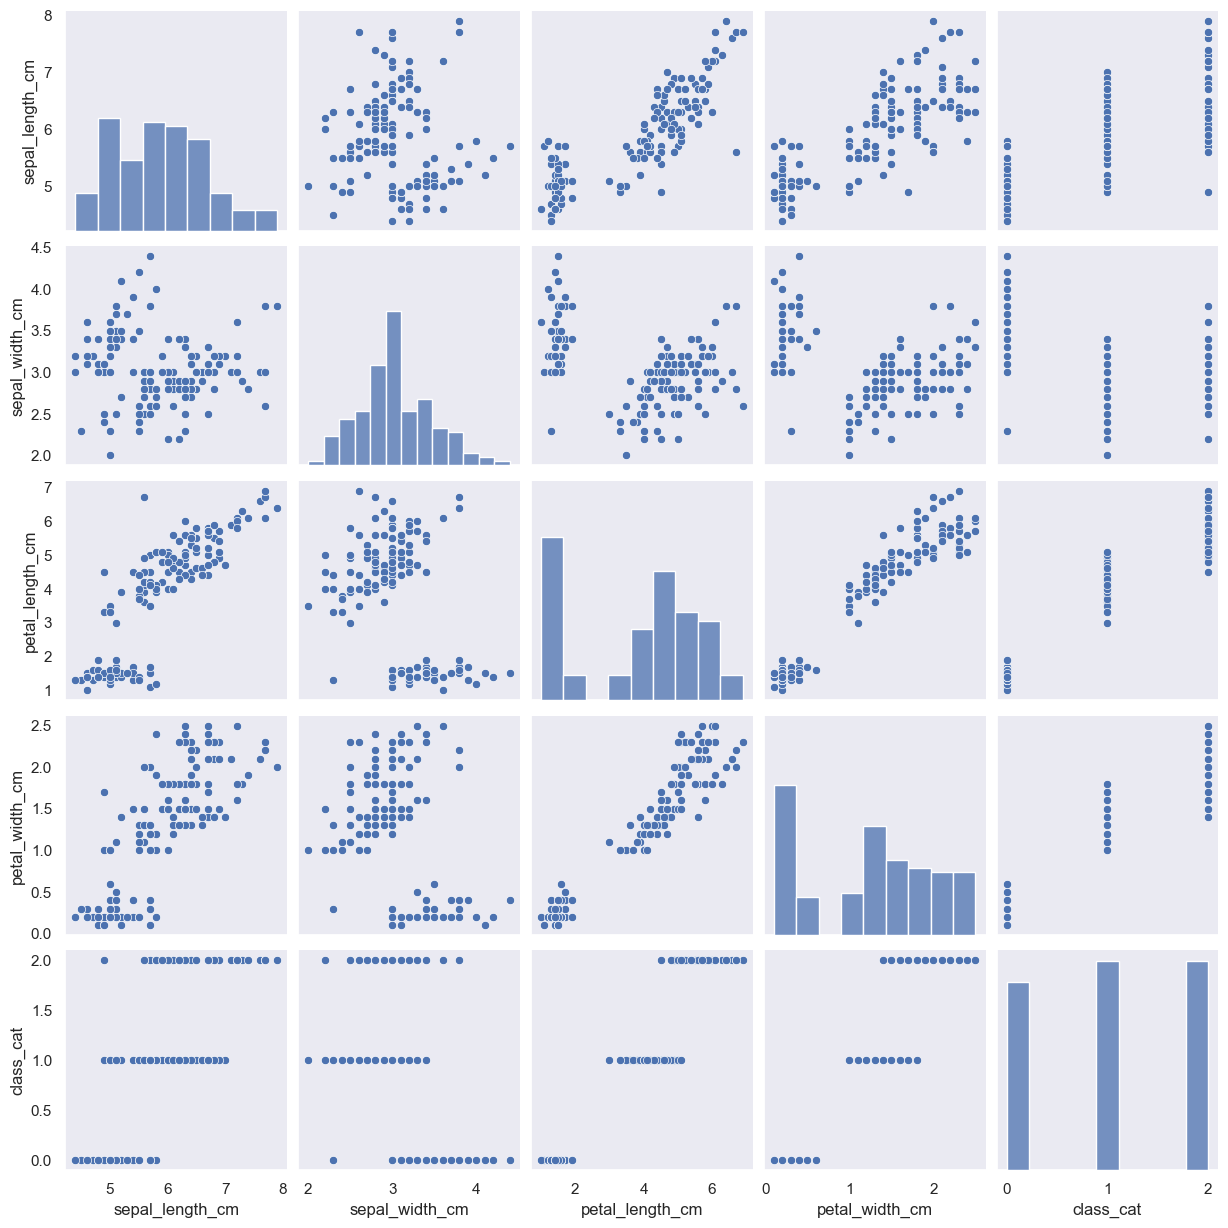

In [71]:
sns.set_theme(style="dark")

sns.pairplot(iris2)

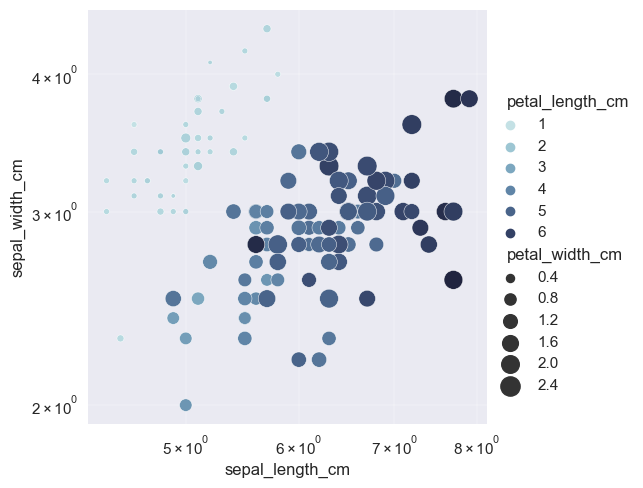

In [72]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=iris2,
    x="sepal_length_cm", y="sepal_width_cm",
    hue="petal_length_cm", size="petal_width_cm",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [73]:
#three groups clearly diferenciate.

iris2.to_csv('final_iris.csv')
